# HW3: Pandas for Data Analysis (100 points)


Please save file with the following format:
*hw3_yourfirstname_yourlastname*. 

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Exercise* 

In [2]:
#Read csv file
df = pd.read_csv("data/Salaries.csv")

In [3]:
#Display top 10  records (2 points)
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [4]:
#Display the last 5 records (2 points)
df.tail(5)

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


---

In [5]:
#Identify the type of df object 
type(df)

pandas.core.frame.DataFrame

In [6]:
#Check the index (2 points)
df.index

RangeIndex(start=0, stop=78, step=1)

In [7]:
#Check the type of a column "salary" (2 points)
df['salary'].dtype

dtype('int64')

In [8]:
#List the types of all columns (2 points)
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [9]:
#List the column names (2 points)
df.columns.values

array(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'],
      dtype=object)

In [10]:
#Number of dimensions  (2 points)
df.ndim

2

In [11]:
#Total number of elements in the Data Frame (2 points)
df.size

468

In [12]:
#Number of rows and columns (2 points)
df.count

<bound method DataFrame.count of          rank discipline  phd  service     sex  salary
0        Prof          B   56       49    Male  186960
1        Prof          A   12        6    Male   93000
2        Prof          A   23       20    Male  110515
3        Prof          A   40       31    Male  131205
4        Prof          B   20       18    Male  104800
..        ...        ...  ...      ...     ...     ...
73       Prof          B   18       10  Female  105450
74  AssocProf          B   19        6  Female  104542
75       Prof          B   17       17  Female  124312
76       Prof          A   28       14  Female  109954
77       Prof          A   23       15  Female  109646

[78 rows x 6 columns]>

In [13]:
#Output basic statistics for the numeric columns (2 points)
df.describe(include = np.number)

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [14]:
#Calculate the standard deviation and mean  for all numeric columns (5 points)
df.describe(include = np.number)

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [15]:
#Calculate average of the columns in the first 50 rows (5 points)
first50 = df.head(50)
first50.describe(include = np.number)

,phd,service,salary
count,50.000000,50.000000,50.000000
mean,21.520000,17.600000,113789.140000
std,13.489588,13.385951,28886.605761
min,1.000000,0.000000,57800.000000
25%,11.250000,6.250000,91475.000000
50%,20.000000,18.000000,108907.500000
75%,29.000000,23.000000,133884.750000
max,56.000000,51.000000,186960.000000


---
### Data slicing and grouping

In [16]:
#Let's see what we get for our df_sub data frame
# Method .loc subset the data frame based on the labels:
df_sub = df.loc[10:20,['rank','sex','salary']]
df_sub

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [17]:
#Extract the 'sex' column by name  (5 points)
df_sub['sex']

10    Male
11    Male
12    Male
13    Male
14    Male
15    Male
16    Male
17    Male
18    Male
19    Male
20    Male
Name: sex, dtype: object

In [18]:
#Calculate the average salary (5 points)
df_sub['salary'].mean()

121300.18181818182

In [19]:
#Group data using rank, #Calculate mean of all numeric columns for the grouped object (5 points)
df_rank = df_sub
df_rank['avg_salary'] = df_sub.groupby('rank').salary.transform('mean')
df_rank['avg_salary']

10    141036.857143
11    141036.857143
12     86761.000000
13    141036.857143
14    141036.857143
15    141036.857143
16     86761.000000
17     86761.000000
18    141036.857143
19    141036.857143
20     86761.000000
Name: avg_salary, dtype: float64

In [20]:
#Group the data using sex, calculate the mean salary for men and women. (5 points) 
avg_salary_sex =  df_sub.groupby(['sex']).salary.mean()
avg_salary_sex

sex
Male    121300.181818
Name: salary, dtype: float64

In [21]:
# Group using 2 variables - sex and rank, 
#then find the mean, median, min, max salary for each group (5 points)
max_salary_grouped =  df_sub.groupby(['sex', 'rank'])
max_salary_grouped.describe().reset_index()

sex      rank salary                                                   \
                   count           mean           std       min       25%   
0  Male  AsstProf    4.0   86761.000000   8035.700592   75044.0   84761.0   
1  Male      Prof    7.0  141036.857143  18837.370547  107300.0  131514.0   

                                avg_salary                                     \
        50%       75%       max      count           mean  std            min   
0   90000.0   92000.0   92000.0        4.0   86761.000000  0.0   86761.000000   
1  150480.0  152125.0  162200.0        7.0  141036.857143  0.0  141036.857143   

                                                               
             25%            50%            75%            max  
0   86761.000000   86761.000000   86761.000000   86761.000000  
1  141036.857143  141036.857143  141036.857143  141036.857143

---
### Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



---
### Filtering

In [22]:
#Select observation with the value in the salary column > 120K
df_sub = df[ df['salary'] > 120000]
df_sub.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [23]:
#Select data for female professors. and find the mean value of the salary for them
#(5 points)
df_sub = df[ df['sex'] == 'Female']
df_sub['salary'].mean()


101002.41025641025

In [24]:
# Extract (filter) only observations with high salary ( > 100K) and
# find how many female and male professors in each group (5 points)
df_sub = df[ df['salary'] > 100000]
df_sub.groupby(['sex']).size()

sex
Female    21
Male      25
dtype: int64

The simplest way to get row counts per group is by calling .size()

### Sorting the Data

In [25]:
#Sort the data frame by yrs.service and create a new data frame
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [26]:
# Sort data frame by the salary (in descending order) and display the first few records of the output (head) (5 points)
df_sorted.sort_values(by = 'salary', ascending = False).head(5)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
13,Prof,B,35,33,Male,162200
72,Prof,B,24,15,Female,161101
27,Prof,A,45,43,Male,155865
31,Prof,B,22,21,Male,155750


---

### Explore data using graphics

<AxesSubplot:>

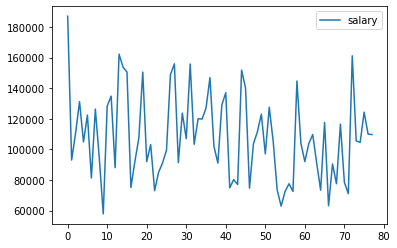

In [27]:
#Use pandas plotting to draw a line of the salary distribution in the data (10 points)
df.plot.line(y = 'salary')

<AxesSubplot:ylabel='None'>

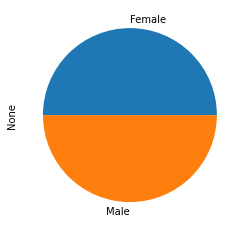

In [28]:
#Use pandas plotting to draw a pie chart of the total number of male versus female professors in the dataset (10 points)
df.groupby(['sex']).size().plot.pie()

<AxesSubplot:title={'center':'Average Salary by Service'}>

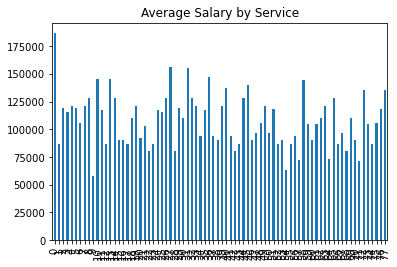

In [29]:
# Based on the data, think of another graph you can plot (10 points)
#df.groupby(['service']).size().plot.bar(y = 'salary')
df_plot = df
df_plot['avg_salary'] = df_plot.groupby('service').salary.transform('mean')
#df_plot.sort_values('service')
df_plot['avg_salary'].plot.bar(x = 'service', title = "Average Salary by Service")

#Way too messy to look at. Average salary based on years of service. 
#Optimally, we'd group service into buckets, and average from there.